# Giới thiệu cách sử dụng thư viện Pandas
Trong bài học này, chúng ta sẽ tìm hiểu về thư viện Pandas - mảnh ghép cuối cùng trong những thư viện cơ bản cần thiết để chuẩn bị cho MaSSP 2018!

## 1. Pandas là gì?
Khi làm việc với một bảng dữ liệu, chúng ta thường sử dụng những phần mềm như Microsoft Excel để nhanh chóng thực hiện các thao tác như sắp xếp dữ liệu, vẽ biểu đồ, thực hiện tính toán...

!['Google Spreadsheet'](images/google_spreadsheet.png)
!['Google Spreadsheet Chart'](images/google_spreadsheet_chart_1.png)


Tuy nhiên, các công cụ này chỉ phù hợp khi làm việc với khối lượng dữ liệu nhỏ. Với những dataset lớn, chúng ta cần những công cụ chuyên dụng hơn, ví dụ như Pandas.

Pandas là một thư viện mã nguồn mở giúp các thao tác khi làm việc với cấu trúc dữ liệu dạng bảng trở nên dễ dàng hơn. Trang chủ của Pandas: http://pandas.pydata.org/pandas-docs/stable/.

Trong bài này, các bạn sẽ học các nội dung sau:
* Cấu trúc dữ liệu trong Pandas
* Xử lý dữ liệu đầu vào
* Chuyển đổi dữ liệu
* Minh hoạ dữ liệu

Trước hết, hãy nhập những thư viện cần dùng trong bài này.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. Cấu trúc dữ liệu trong Pandas
Có 2 dạng cấu trúc dữ liệu quan trọng trong Pandas: Series và Dataframe. Nói một cách đơn giản, Series thể hiện một hàng hay một cột dữ liệu cùng loại, và Dataframe có thể gồm 1 hay nhiều Series.

### 2.1 Series
Trong một Series, ngoài các dữ liệu trong hàng hay cột, nó còn chứa các nhãn (index), ứng với tên của từng hàng hay từng cột. Ví dụ, Series sau thể hiện số môn học của MaSSP trong 3 năm từ 2016 đến 2018: 

In [2]:
s = pd.Series(data=[2, 4, 5], index=["Năm 2016", "Năm 2017", "Năm 2018"])
print("s:")
print(s)

print("\nIndex của s: ")
print(s.index)

s:
Năm 2016    2
Năm 2017    4
Năm 2018    5
dtype: int64

Index của s: 
Index(['Năm 2016', 'Năm 2017', 'Năm 2018'], dtype='object')


Các bạn thấy rằng dữ liệu nhập vào `data` cũng như nhãn `index` đều có dạng list.

Ngoài ra, ta còn có thể khởi tạo Series bằng cách nhập vào một `dictionary`, với `key` là nhãn, và `value` là dữ liệu tương ứng.

In [3]:
s = pd.Series(data = { "Năm 2016": 2, "Năm 2017": 4, "Năm 2018": 5})
s

Năm 2016    2
Năm 2017    4
Năm 2018    5
dtype: int64

Khi đã hiểu dữ liệu trong Series biểu hiện như một `list` và cũng có thể biểu hiện như một `dictionary`, ta có thể suy ra các truy cập từng phần tử hay một nhóm các phần tử trong Series như sau:

In [4]:
s["Năm 2018"]

5

In [5]:
s[0]

2

In [6]:
s[1:]

Năm 2017    4
Năm 2018    5
dtype: int64

Ngoài ra, chúng ta cũng có thể thực hiện các thao tác tính toán lên một Series. Ví dụ:

In [7]:
s*2

Năm 2016     4
Năm 2017     8
Năm 2018    10
dtype: int64

### 2.2 Dataframe
Khác với Series là cấu trúc dữ liệu một chiều, Dataframe là cấu trúc dữ liệu 2 chiều, và các cột có thể chứa các loại dữ liệu khác nhau (xâu, số nguyên, số thập phân...).

Có nhiều cách để khởi tạo một Dataframe:
- Từ một `dict` của các lists, dicts, hoặc Series
- Từ numpy.ndarray
- Từ một Series
- Từ một DataFrame khác

In [8]:
# Từ một dict của các lists, dicts, hoặc Series
# Tên các hàng nếu không được cung cấp sẽ được tự động đánh số
df = pd.DataFrame({ "Cột 1": [1, 2, 3], "Cột 2": [2, 4, 6] })
df

,Cột 1,Cột 2
0,1,2
1,2,4
2,3,6


In [9]:
# Trường hợp này, các cột có loại dữ liệu khác nhau 
data = {'Country': ['Belgium', 'India', 'Brazil'],
        'Capital': ['Brussels', 'New Delhi', 'Brasília'],
        'Population': [11190846, 1303171035, 207847528]}
df = pd.DataFrame(data, columns=['Country', 'Capital', 'Population'])
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [10]:
# Từ numpy.ndarray
df = pd.DataFrame(np.arange(0, 5))
df

,0
0,0
1,1
2,2
3,3
4,4


In [11]:
# Từ một Series
df = pd.DataFrame(s, columns = ["Số học sinh"])
df

,Số học sinh
Năm 2016,2
Năm 2017,4
Năm 2018,5


In [12]:
# Từ một DataFrame khác
df2 = pd.DataFrame(df[0:2])
df2

,Số học sinh
Năm 2016,2
Năm 2017,4


__Checkpoint 1__: Hãy tìm một bảng dữ liệu đơn giản trên mạng (có thể tham khảo các trang web đề cập trong file `README.md`), và khởi tạo các Series, DataFrame tương ứng.

## 3. Xử lý dữ liệu đầu vào
Trong phần này, chúng ta sẽ học cách nhập dữ liệu vào DataFrame, dùng những hàm có sẵn trong `pandas` để có cái nhìn tổng quát về dữ liệu được nhập, cũng như học những hàm hay dùng để chọn dữ liệu, hoặc xử lý dữ liệu bị thiếu.

### 3.1 Nhập dữ liệu đầu vào
Phần lớn dữ liệu thu thập trên mạng được lưu trong các tệp tin có định dạng `csv` (comma-separated values). Định dạng này có thể được đọc bởi những phần mềm khác nhau như Microsoft Excel, Numbers, Google Spreadsheet, và có thể được chuyển hoá dễ dàng sang các định dạng khác như `xlxs`. Để làm theo các thao tác trong lab này, các bạn có thể sử dụng tệp tin "weather_in_Hanoi.csv".

Trước hết, hàm [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv) được sử dụng để đọc dữ liệu trong tệp tin có định dạng `csv` vào một Dataframe.

In [41]:
df = pd.read_csv('weather_in_Hanoi.csv')
df

,month,min_temperature (F),max_temperature (F),rainfall (mm),rainy_days
0,1,57,66,25,9
1,2,59,68,30,11
2,3,65,74,40,15
3,4,72,80,90,13
4,5,75,89,180,14
5,6,77,91,240,15
6,7,77,90,280,16
7,8,78,90,325,17
8,9,76,85,270,14
9,10,72,77,130,9


Pandas cung cấp một số hàm có sẵn, giúp ta có được cái nhìn toàn thể về bảng dữ liệu.
* Hàm `head()` và `tail()` trả một DataFrame chứa một số hàng đầu hoặc cuối của bảng dữ liệu
* `index` và `columns` trả dãy các nhãn của các hàng và cột
* Hàm `info()` và `describe()` cho biết thông tin về loại dữ liệu, cũng như các thông số quan trọng trong các cột
Các bạn hãy thực hiện các lệnh sau để thấy rõ hơn:

In [ ]:
# Nếu không cung cấp số hàng, hai hàm này sẽ trả về nhiều nhất là 5 hàng
df.head()

In [ ]:
df.tail(3)

In [ ]:
# Trả nhãn của các cột
df.columns

In [17]:
# Trả nhãn của các hàng. Trong trường hợp này là các số từ 0 đến 11 do ta không cung cấp index
df.index

RangeIndex(start=0, stop=12, step=1)

In [ ]:
# Hàm info mô tả loại dữ liệu và số dữ liệu có trong mỗi cột
df.info()

In [ ]:
# Hàm describe lần lượt tính số dữ liệu, trung bình, độ lệch chuẩn, giá trị nhỏ nhất, 
# giá trị nằm ở khoảng 25%, 50%, 75%, và giá trị lớn nhất của từng hàng
df.describe()

__Checkpoint 2__: Hãy thử giải thích xem những con số thu được dưới cột `month`, hàng `25%, 50%, 75%` trong đầu ra của `df.describe()` ở trên là từ đâu ra?

### 3.2 Lấy dữ liệu từ hàng, cột
Việc chọn nguyên một cột từ DataFrame là hết sức đơn giản, tương tự việc chọn giá trị `value` từ một `dictionary`, khi biết `key`. Loại dữ liệu thu được chính là Series!

In [ ]:
print(df['min_temperature (F)'])
print("\nLoại dữ liệu: {}".format(type(df['min_temperature (F)'])))

Đặc biệt, đối với những cột có tên không có dấu cách, ví dụ `month`, ta có thể dùng `df.month` thay vì `df['month']`.

In [ ]:
df.month

Để chọn được nhiều cột một lúc, ta chỉ cung cấp một list chứa tên của các cột cần chọn. Lưu ý dạng dữ liệu của kết quả thu được là DataFrame!

In [ ]:
# Chọn 2 cột 'month', 'min_temperature (F)'
df[['month', 'min_temperature (F)']]

In [23]:
type(df[['month', 'min_temperature (F)']])

pandas.core.frame.DataFrame

Để chọn được một hàng, ta dùng `loc` và cung cấp vị trí của hàng, hoặc dùng `iloc` và cung cấp index của hàng. Trong ví dụ hiện tại, index cũng chính là số thứ tự của mỗi hàng.

In [ ]:
df.loc[3]

In [ ]:
df.iloc[3]

Tương tự như cách chọn nhiều cột, bạn có đoán được cách chọn nhiều hàng một lúc không?

In [26]:
# code


Kết hợp cách tìm một hàng trong DataFrame, và tìm một phần tử trong Series, ta có thể chọn một phần tử bất kì trong DataFrame:

In [27]:
df.loc[3]['min_temperature (F)']

72

Cuối cùng, để chọn một DataFrame nhỏ hơn trong DataFrame hiện tại, ta cũng sử dụng cú pháp tương tự như chọn hàng và cột.

In [ ]:
# Chọn 2 cột 'max_temperature (F)', 'min_temperature (F)' của 4 tháng đầu tiên
df.loc[0:3][['max_temperature (F)', 'min_temperature (F)']]

Ngoài cách chọn hàng và cột theo tên hay vị trí, chúng ta còn có thể chọn những hàng, cột thoả mãn một điều kiện nào đó. Ví dụ để chọn những tháng có lượng mưa nhiều hơn 110 mm:

In [ ]:
df[df['rainfall (mm)'] > 110]

__Checkpoint 3__: Sử dụng các hàm đã học để trả lời những câu hỏi sau:
1. Lấy dữ liệu lượng mưa (rainfall) và nhiệt độ cao nhất (max_temperature (F)) vào tháng 6 và tháng 7 tại Hà Nội - thời điểm diễn ra MaSSP 2018!
2. Những tháng nào có nhiệt dộ thấp nhất (min_temperature (F)) bằng 77?
3. Chỉ ra 3 tháng có số ngày mưa lớn nhất.

### 3.3 Xử lý số liệu bị thiếu

Bạn có biết rằng phần lớn thời gian của nhà Khoa học Dữ liệu là dành cho việc xử lý dữ liệu ban đầu? Có rất nhiều yếu tố có thể ảnh hưởng đến chất lượng của dữ liệu chúng ta thu thập được.

Ví dụ khi phát phiếu khảo sát về vấn đề nào đó trong xã hội, việc tất cả người dân điền phiếu khảo sát là điều không tưởng! Chưa hết, có những người chỉ trả lời một nửa số câu hỏi, bỏ trống các câu còn lại. Vậy chúng ta nên bỏ những phiếu không đầy đủ đi, hay đơn giản là không tính những câu trả lời trống?

Một ví dụ khác liên quan đến việc ghi lại lộ trình của xe ô tô qua tín hiệu GPS trên điện thoại. Dữ liệu thu được phải rất đáng tin cậy phải không nào? Tuy nhiên, nếu ô tô đi qua hầm cầu, tín hiệu GPS sẽ bị mất, và dữ liệu thu được còn không còn liên tục nữa.

Trong phần này, chúng ta sẽ chỉ học cách điền dữ liệu còn thiếu trong DataFrame bằng một giá trị mặc định. Đầu tiên, bạn hãy sử dụng những hàm đã học ở trên, nhập dữ liệu có trong tệp tin "cs_applications.csv" vào biến `df2`.

In [ ]:
# code
df2 = ...

Ta dễ dàng thấy rằng những câu trả lời để trống sẽ có dạng `NaN` (Not a Number). Hãy sử dụng hàm `info()` để xem thông tin về số lượng dữ liệu trong mỗi cột, và mở xem nội dung của tệp tin "cs_applications.csv" cùng lúc. Bạn có thấy đầu ra của hàm `info()` phản ánh đúng số dữ liệu bị thiếu trong tệp tin?

In [31]:
# code


Trong những cột cần giá trị số như `Điểm phẩy môn Toán` và `Điểm phẩy môn Tin`, ta sẽ chọn giá trị mặc định là `0.0` (đừng lo, điểm phẩy chỉ mang tính chất tham khảo trong quyết định chọn học sinh cho môn Tin học!). Đối với như cầu hỗ trợ kí túc xá, giá trị mặc định sẽ là `Không` nếu thí sinh không trả lời câu này.

Cú pháp để chuyển đổi các giá trị `NaN` thành các giá trị mặc định theo từng cột là:

In [32]:
df2.fillna({ "Điểm phẩy môn Toán": 0.0, "Điểm phẩy môn Tin": 0.0 }, inplace=True)
df2

,Thí sinh,Điểm phẩy môn Toán,Điểm phẩy môn Tin,Cần hỗ trợ kí túc xá
1,A,9.1,0.0,Không
2,B,8.7,9.5,Có
3,C,7.9,0.0,NaN
4,D,8.2,8.5,NaN
5,E,0.0,0.0,Không


Các bạn lưu ý khi cung cấp `inplace=True`, DataFrame `df2` sẽ thay đổi "tại chỗ". Nếu không cung cấp giá trị này, `df2` sẽ không bị biến đổi, các giá trị `NaN` sẽ không bị thay thế bởi `0.0`.

__Checkpoint 4__: Hãy chuyển đổi các giá trị `NaN` trong cột "Cần hỗ trợ kí túc xá" thành "Không". Lần này, hãy thử hàm `fillna` khi _không_ cung cấp `inplace=True` trước, và so sánh với giá trị của `df2` khi cung cấp `inplace=True`.

## 4. Chuyển đổi dữ liệu
Khi xử lý dữ liệu, ngoài việc xử lý các dữ liệu bị thiếu, nhiều khi dữ liệu ban đầu chúng ta thu thập được chưa phải là dữ liệu cần thiết cho các bước tiếp theo như minh hoạ dữ liệu, chạy mô hình Machine Learning,... Ví dụ trong bảng dữ liệu lấy được từ tệp tin "weather_in_Hanoi.csv", đơn vị nhiệt độ của hai cột `min_temperature` và `max_temperature` là độ F (Fahrenheit) thay vì độ C (Celsius) quen thuộc:

In [ ]:
df = pd.read_csv('weather_in_Hanoi.csv')
df

Để dữ liệu trở nên dễ hiểu, chúng ta sẽ thêm vào các cột sau vào `df`:
- 'max_temperature (C)': nhiệt độ cao nhất theo độ C
- 'min_temperature (C)': nhiệt độ thấp nhất theo độ C
- 'rainfall (cm)': lưu lượng mưa tính theo cm

Sau đây là công thức chuyển đổi độ F sang độ C:
$$T_{(°C)} = \frac{(T_{(°F)} - 32)}{1.8}$$
Và để thêm vào DataFrame `df` một cột mới, ta dùng cú pháp tương tự như thêm một cặp `key, value` vào `dictionary`:

In [34]:
df['max_temperature (C)'] = (df['max_temperature (F)'] - 32 ) / 1.80

__Checkpoint 5__: Hãy thêm vào các cột 'min_temperature (C)' và 'rainfall (cm)'. Cuối cùng, bạn hãy tạo một DataFrame mới `df2`, chỉ chứa các cột `'month', 'max_temperature (C)', 'min_temperature (C)', 'rainfall (cm)', 'rainy_days'` từ `df`. Chúng ta sẽ dùng `df2` cho phần Minh hoạ dữ liệu!

In [36]:
df2 = ...

,month,max_temperature (C),min_temperature (C),rainfall (cm),rainy_days
0,1,18.888889,13.888889,2.5,9
1,2,20.000000,15.000000,3.0,11
2,3,23.333333,18.333333,4.0,15
3,4,26.666667,22.222222,9.0,13
4,5,31.666667,23.888889,18.0,14
5,6,32.777778,25.000000,24.0,15
6,7,32.222222,25.000000,28.0,16
7,8,32.222222,25.555556,32.5,17
8,9,29.444444,24.444444,27.0,14
9,10,25.000000,22.222222,13.0,9


## 5. Minh họa dữ liệu
Phần này yêu cầu chúng ta phải đọc hiểu các hàm trong thư viện Pandas. Các bạn có thể tham khảo tutorial của họ để tìm thêm nhiều cách vẽ và thêm chi tiết và đồ thị: http://pandas.pydata.org/pandas-docs/stable/10min.html.

Ngoài việc có thể dùng thư viện `matplotlib` để khởi tạo đồ thị, ta còn có thể dùng trực tiếp lệnh trong Pandas:

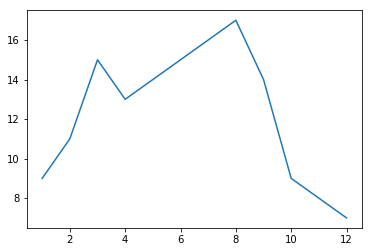

In [37]:
# Dùng matplotlib
plt.plot(df2.month, df2.rainy_days)
plt.show()

In [38]:
# Dùng pandas 
df2.plot()

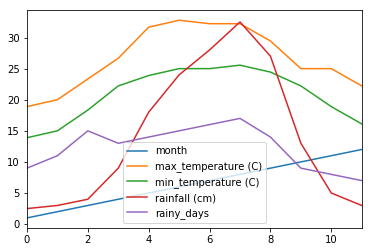

In [39]:
plt.show()

Các bạn có thể dễ dàng nhận thấy Pandas đã format sẵn màu sắc cũng như bảng giải thích kí hiệu.

__Checkpoint 6__: Hãy thử vẽ một số đồ thị tuỳ thích dựa theo những số liệu có thật, có ý nghĩa với bản thân bạn, và chia sẻ lên group Facebook để mọi người cùng biết nhé!

Sau đây là một số những trang web có thể tìm thấy số liệu thống kê:
- https://www.kaggle.com/
- https://www.gso.gov.vn/
- https://www.data.gov/
- https://data.gov.uk/
- https://data.gov.sg/
- https://data.worldbank.org/
- http://data.go.id/